In [2]:
from qiskit.visualization import plot_distribution
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit import QuantumCircuit
from qiskit.circuit.library import grover_operator, MCMTGate, ZGate
from qiskit.primitives import StatevectorSampler

from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit_ibm_runtime import SamplerV2 as Sampler

from oracles_grover import marked_oracle

import math


This is for creating the oracle. Use different function that creates on the fly oracle instead of marked_oracle function. Define that in oracles_grover.py

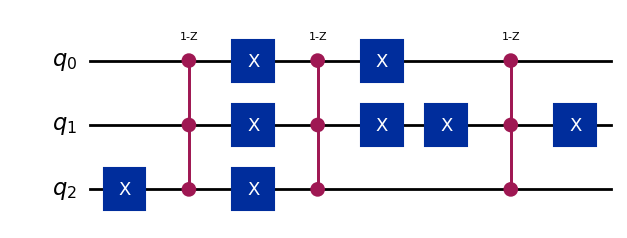

In [3]:
marked_states = ["011", "100",'101']
oracle = marked_oracle(marked_states)
oracle.draw(output="mpl", style="iqp")

Below grover op is created using our oracle.

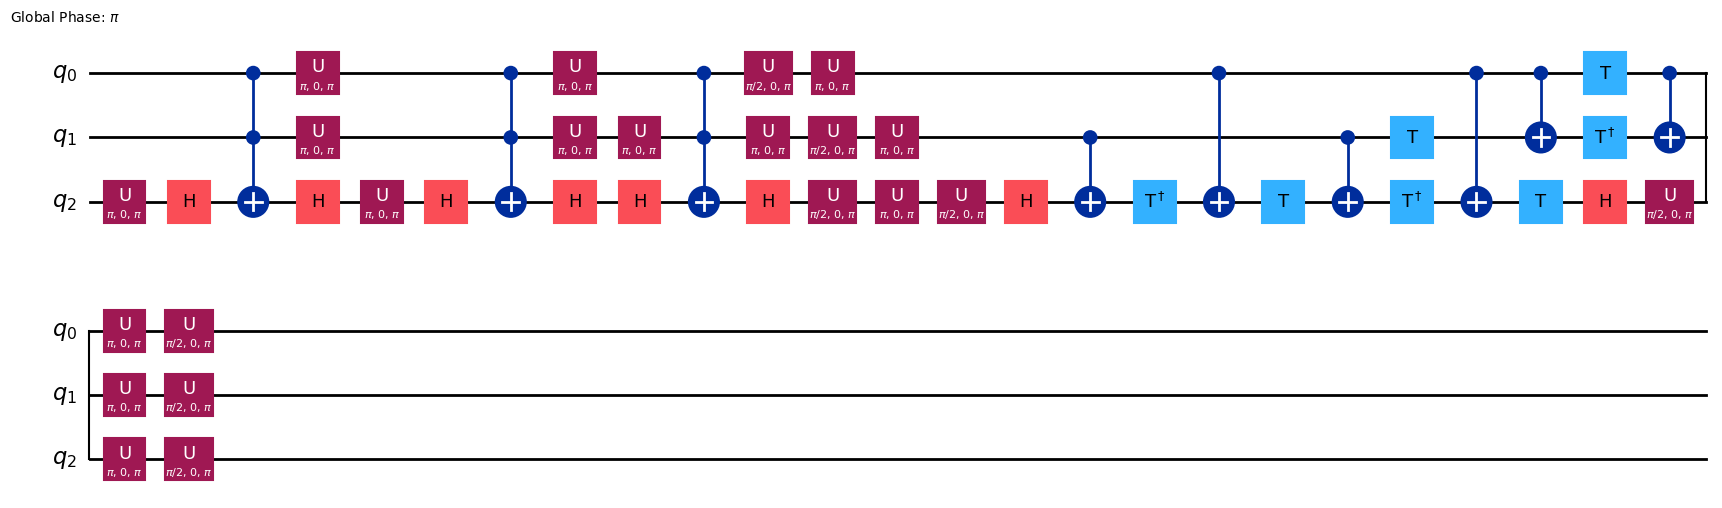

In [4]:
grover_op = grover_operator(oracle) #creates a grover operator using oracle
grover_op.decompose().draw(output="mpl", style="iqp")

Setting number of iterations to pi/4 (sqrt(M/N)) (M is the number of solutions i.e. marked states)

In [5]:
optimal_num_iterations = math.floor(
    math.pi
    / (4 * math.asin(math.sqrt(len(marked_states) / 2**grover_op.num_qubits)))
)

Composing Overall Circuit Below. In Close Neighbors compose at every iteration (not grover the outer one) and change iterations dependning upo the algorithm

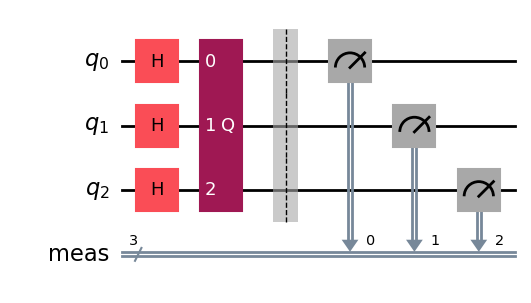

In [6]:
qc = QuantumCircuit(grover_op.num_qubits)
qc.h(range(grover_op.num_qubits)) #Hadamard Transform
qc.compose(grover_op.power(optimal_num_iterations), inplace=True) #grover iteration
# Measure all qubits
qc.measure_all()
qc.draw(output="mpl", style="iqp")

Commented Code Below is for running on an actual backend. I am using StateVectorSampler in qiskit for simulation

In [ ]:
# target = backend.target
# pm = generate_preset_pass_manager(target=target, optimization_level=3)
 
# circuit_isa = pm.run(qc)
# circuit_isa.draw(output="mpl", idle_wires=False, style="iqp")

Changed to qiskit_ibm_runtime samplerV2  for real backend

In [25]:
sampler = StatevectorSampler(default_shots=1024)
result = sampler.run([qc], shots=1024).result()[0]
dist = result[0].data.meas.get_counts()
# bitstring = result.join_data().get_bitstrings()[0]  #Commented Code is for one-shot sampling i.e. measuring once. This gives the bitrsting allowing us to check for a solution as well.
# print (bitstring)

100


For plotting distribution of bitstrings after plots

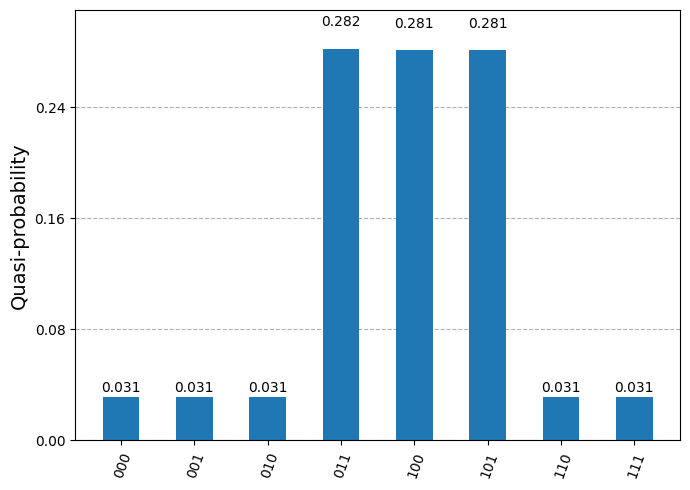

In [13]:
plot_distribution(dist)